In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from datetime import datetime, timedelta

sns.set(style='white', context='notebook', palette='deep')

In [2]:
ticket = pd.read_csv("ticketdata2.csv")
ticket['my_date'] = pd.to_datetime(ticket['my_date'])
ticket.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,PLAY_DATE,PLAY_TIME,TICKET_BOOTH_RUNNING_NUM,...,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS,my_date
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/17,15:00,41139,...,10,NaN,5,61,300.0,26237,0,male,2103,2010-10-14 23:25:58
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/17,15:00,41138,...,10,NaN,5,61,300.0,26237,0,male,2103,2010-10-14 23:25:58
2,378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/17,15:00,39579,...,129,NaN,10,129,434.0,24923,0,male,2682,2010-09-18 23:26:37
3,379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/17,15:00,39580,...,129,NaN,10,129,434.0,24923,0,male,2682,2010-09-18 23:26:37
4,586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/17,15:00,39596,...,14,NaN,2,14,201.0,24930,0,male,718,2010-09-18 23:28:56


In [3]:
ticket['my_date_open'] = ticket['my_date']

ticket['ORDER_ID'].equals(ticket['ORDER_NUM'])
ticket.drop(['PROGRAM_NAME','PLAY_DATE','PLAY_TIME', 'PROGRAM_ID', 'ORDER_NUM',
            'SHIPPING_ZIP1', 'SHIPPING_COUNTRY_ID1', 'SHIPPING_TOWN_ID1', 'ADDRESS',
            'SHIPPING_COUNTRY_ID2', 'SHIPPING_TOWN_ID2', 'SHIPPING_ZIP2', 
             'TICKET_SHIPPING_RATE_ID', 'RECEIPT_TITLE'], axis=1, inplace=True)
ticket.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open
0,331,26237,52196,2,K12197,41139,1800,non-member,Floor3Sectionyellow3I,1,11.0,10.0,50,0,male,2010-10-14 23:25:58,2010-10-14 23:25:58
1,332,26237,52195,2,K12197,41138,1800,non-member,Floor3Sectionyellow3I,1,11.0,11.0,50,0,male,2010-10-14 23:25:58,2010-10-14 23:25:58
2,378,24923,46903,3,L22289,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,50,0,male,2010-09-18 23:26:37,2010-09-18 23:26:37
3,379,24923,46902,3,L22289,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,50,0,male,2010-09-18 23:26:37,2010-09-18 23:26:37
4,586,24930,46919,4,C12101,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,50,0,male,2010-09-18 23:28:56,2010-09-18 23:28:56


In [4]:
min(ticket['my_date'])

Timestamp('2010-09-18 13:18:55')

In [5]:
ticket['my_date_open'] = ticket['my_date_open'].apply(lambda x:x.replace(year=2010, month=9, day=18, hour=13,minute=18,second=55))
ticket.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open
0,331,26237,52196,2,K12197,41139,1800,non-member,Floor3Sectionyellow3I,1,11.0,10.0,50,0,male,2010-10-14 23:25:58,2010-09-18 13:18:55
1,332,26237,52195,2,K12197,41138,1800,non-member,Floor3Sectionyellow3I,1,11.0,11.0,50,0,male,2010-10-14 23:25:58,2010-09-18 13:18:55
2,378,24923,46903,3,L22289,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55
3,379,24923,46902,3,L22289,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55
4,586,24930,46919,4,C12101,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,50,0,male,2010-09-18 23:28:56,2010-09-18 13:18:55


In [6]:
ticket['diff'] = ticket['my_date'] - ticket['my_date_open']
ticket.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
0,331,26237,52196,2,K12197,41139,1800,non-member,Floor3Sectionyellow3I,1,11.0,10.0,50,0,male,2010-10-14 23:25:58,2010-09-18 13:18:55,26 days 10:07:03
1,332,26237,52195,2,K12197,41138,1800,non-member,Floor3Sectionyellow3I,1,11.0,11.0,50,0,male,2010-10-14 23:25:58,2010-09-18 13:18:55,26 days 10:07:03
2,378,24923,46903,3,L22289,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,0 days 10:07:42
3,379,24923,46902,3,L22289,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,0 days 10:07:42
4,586,24930,46919,4,C12101,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,50,0,male,2010-09-18 23:28:56,2010-09-18 13:18:55,0 days 10:10:01


In [7]:
max(ticket['diff'])

Timedelta('26 days 10:40:20')

In [8]:
min(ticket['diff'])

Timedelta('0 days 00:00:00')

In [9]:
ticket.sort_values('diff')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
6430,35032,21314,38906,4,E12347,31648,3500,member,Floor2Sectionyellow2B,1,9.0,24.0,50,0,male,2010-09-18 13:18:55,2010-09-18 13:18:55,0 days 00:00:00
6650,35508,21315,38910,4,C12086,31652,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,0 days 00:03:38
6651,35509,21315,38909,4,C12086,31651,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,0 days 00:03:38
6652,35510,21315,38908,5,C12086,31650,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,0 days 00:03:38
6653,35511,21315,38907,6,C12086,31649,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,0 days 00:03:38
952,12327,21316,38913,3,G22178,31653,2500,member,Floor3Sectionyellow3F,1,1.0,3.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,0 days 00:04:53
953,12328,21316,38912,3,G22178,31655,2500,member,Floor3Sectionyellow3F,1,1.0,1.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,0 days 00:04:53
954,12329,21316,38911,3,G22178,31654,2500,member,Floor3Sectionyellow3F,1,1.0,2.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,0 days 00:04:53
2426,25857,21317,38915,3,S12312,31657,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,0 days 00:10:51
2427,25858,21317,38914,3,S12312,31656,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,0 days 00:10:51


In [10]:
ticket.describe(include='all')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
count,7069.000000,7069.000000,7069.000000,7069.000000,7069,7069.000000,7069.000000,7069,7069,7069.0,5400.000000,5400.000000,7069.000000,7069.000000,7069,7069,7069,7069
unique,NaN,NaN,NaN,NaN,2724,NaN,NaN,2,27,NaN,NaN,NaN,NaN,NaN,2,3159,1,NaN
top,NaN,NaN,NaN,NaN,F22648,NaN,NaN,member,Floor3Sectionyellow3G,NaN,NaN,NaN,NaN,NaN,male,2010-09-18 20:23:41,2010-09-18 13:18:55,NaN
freq,NaN,NaN,NaN,NaN,13,NaN,NaN,6307,514,NaN,NaN,NaN,NaN,NaN,4240,12,7069,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18 13:18:55,2010-09-18 13:18:55,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-14 23:59:15,2010-09-18 13:18:55,NaN
mean,26155.697411,23314.731928,43799.676758,3.824162,NaN,36124.517471,2997.538549,NaN,NaN,1.0,12.512593,11.368333,49.865610,0.236101,NaN,NaN,NaN,2 days 14:50:35.401612
std,9624.311148,1338.398982,3498.006181,2.019586,NaN,2714.591945,982.633380,NaN,NaN,0.0,6.905484,6.782690,2.588893,0.424715,NaN,NaN,NaN,6 days 23:22:19.120098
min,331.000000,21314.000000,38906.000000,1.000000,NaN,31648.000000,800.000000,NaN,NaN,1.0,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0 days 00:00:00
25%,20645.000000,22156.000000,40989.000000,3.000000,NaN,33732.000000,1800.000000,NaN,NaN,1.0,7.000000,6.000000,50.000000,0.000000,NaN,NaN,NaN,0 days 03:21:21


In [11]:
df = (ticket.loc[ticket['Ticket_Type'] == 'member'])
df.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
2,378,24923,46903,3,L22289,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,10:07:42
3,379,24923,46902,3,L22289,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,10:07:42
4,586,24930,46919,4,C12101,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,50,0,male,2010-09-18 23:28:56,2010-09-18 13:18:55,10:10:01
6,608,23352,43680,13,133062,36400,3500,member,Floor2Sectionred2C,1,11.0,10.0,50,0,female,2010-09-18 18:19:26,2010-09-18 13:18:55,05:00:31
7,609,23352,43678,12,133062,36398,3500,member,Floor2Sectionred2C,1,11.0,9.0,50,0,female,2010-09-18 18:19:26,2010-09-18 13:18:55,05:00:31


In [12]:
df.describe(include='all')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
count,6307.000000,6307.000000,6307.000000,6307.000000,6307,6307.000000,6307.000000,6307,6307,6307.0,4847.000000,4847.000000,6307.000000,6307.000000,6307,6307,6307,6307
unique,NaN,NaN,NaN,NaN,2421,NaN,NaN,1,27,NaN,NaN,NaN,NaN,NaN,2,2701,1,NaN
top,NaN,NaN,NaN,NaN,H12366,NaN,NaN,member,Floor3Sectionyellow3C,NaN,NaN,NaN,NaN,NaN,male,2010-09-18 20:23:41,2010-09-18 13:18:55,NaN
freq,NaN,NaN,NaN,NaN,13,NaN,NaN,6307,475,NaN,NaN,NaN,NaN,NaN,3785,12,6307,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18 13:18:55,2010-09-18 13:18:55,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-19 12:44:46,2010-09-18 13:18:55,NaN
mean,25606.112732,23018.503250,42874.925955,4.044554,NaN,35596.427620,2985.841129,NaN,NaN,1.0,12.697339,11.399835,49.849374,0.231489,NaN,NaN,NaN,0 days 04:54:44.397494
std,9626.675159,1088.585568,2400.206136,2.030003,NaN,2377.702627,986.665425,NaN,NaN,0.0,7.008676,6.733398,2.740405,0.421817,NaN,NaN,NaN,0 days 03:08:06.504319
min,378.000000,21314.000000,38906.000000,1.000000,NaN,31648.000000,800.000000,NaN,NaN,1.0,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,0 days 00:00:00
25%,19883.500000,22055.000000,40756.500000,3.000000,NaN,33500.500000,1800.000000,NaN,NaN,1.0,7.000000,6.000000,50.000000,0.000000,NaN,NaN,NaN,0 days 03:09:47


In [13]:
max(df['diff'])

Timedelta('0 days 23:25:51')

In [14]:
df['TICKET_ITEM_ID'] =df['TICKET_ITEM_ID'].astype(str)
df['SERIAL_ID'] =df['SERIAL_ID'].astype(str)

df['TICKET_ENTRANCE_NO'] =df['TICKET_ENTRANCE_NO'].astype(str)
df['ORDER_ID'] =df['ORDER_ID'].astype(str)

C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [15]:
df.dtypes

SERIAL_ID                            object
ORDER_ID                             object
TICKET_ITEM_ID                       object
PRINT_TIMES                           int64
IDENTITY                             object
TICKET_BOOTH_RUNNING_NUM              int64
PRICE                                 int64
Ticket_Type                          object
Seat_Type                            object
FLOOR_NO                              int64
SEAT_ROW                            float64
SEAT_NO                             float64
TICKET_FEE                            int64
TICKET_ENTRANCE_NO                   object
SEX                                  object
my_date                      datetime64[ns]
my_date_open                 datetime64[ns]
diff                        timedelta64[ns]
dtype: object

In [16]:
df.describe(include='all')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
count,6307,6307,6307,6307.000000,6307,6307.000000,6307.000000,6307,6307,6307.0,4847.000000,4847.000000,6307.000000,6307,6307,6307,6307,6307
unique,6307,2870,6307,NaN,2421,NaN,NaN,1,27,NaN,NaN,NaN,NaN,2,2,2701,1,NaN
top,4492,21510,42461,NaN,H12366,NaN,NaN,member,Floor3Sectionyellow3C,NaN,NaN,NaN,NaN,0,male,2010-09-18 20:23:41,2010-09-18 13:18:55,NaN
freq,1,4,1,NaN,13,NaN,NaN,6307,475,NaN,NaN,NaN,NaN,4847,3785,12,6307,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18 13:18:55,2010-09-18 13:18:55,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-19 12:44:46,2010-09-18 13:18:55,NaN
mean,NaN,NaN,NaN,4.044554,NaN,35596.427620,2985.841129,NaN,NaN,1.0,12.697339,11.399835,49.849374,NaN,NaN,NaN,NaN,0 days 04:54:44.397494
std,NaN,NaN,NaN,2.030003,NaN,2377.702627,986.665425,NaN,NaN,0.0,7.008676,6.733398,2.740405,NaN,NaN,NaN,NaN,0 days 03:08:06.504319
min,NaN,NaN,NaN,1.000000,NaN,31648.000000,800.000000,NaN,NaN,1.0,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0 days 00:00:00
25%,NaN,NaN,NaN,3.000000,NaN,33500.500000,1800.000000,NaN,NaN,1.0,7.000000,6.000000,50.000000,NaN,NaN,NaN,NaN,0 days 03:09:47


In [17]:
df.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
2,378,24923,46903,3,L22289,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,10:07:42
3,379,24923,46902,3,L22289,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,10:07:42
4,586,24930,46919,4,C12101,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,50,0,male,2010-09-18 23:28:56,2010-09-18 13:18:55,10:10:01
6,608,23352,43680,13,133062,36400,3500,member,Floor2Sectionred2C,1,11.0,10.0,50,0,female,2010-09-18 18:19:26,2010-09-18 13:18:55,05:00:31
7,609,23352,43678,12,133062,36398,3500,member,Floor2Sectionred2C,1,11.0,9.0,50,0,female,2010-09-18 18:19:26,2010-09-18 13:18:55,05:00:31


ORDER_ID shows how many orders happen at the same time.

In [18]:
df.sort_values('ORDER_ID')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
6430,35032,21314,38906,4,E12347,31648,3500,member,Floor2Sectionyellow2B,1,9.0,24.0,50,0,male,2010-09-18 13:18:55,2010-09-18 13:18:55,00:00:00
6653,35511,21315,38907,6,C12086,31649,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38
6650,35508,21315,38910,4,C12086,31652,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38
6652,35510,21315,38908,5,C12086,31650,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38
6651,35509,21315,38909,4,C12086,31651,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38
954,12329,21316,38911,3,G22178,31654,2500,member,Floor3Sectionyellow3F,1,1.0,2.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53
953,12328,21316,38912,3,G22178,31655,2500,member,Floor3Sectionyellow3F,1,1.0,1.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53
952,12327,21316,38913,3,G22178,31653,2500,member,Floor3Sectionyellow3F,1,1.0,3.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53
2426,25857,21317,38915,3,S12312,31657,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,00:10:51
2427,25858,21317,38914,3,S12312,31656,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,00:10:51


In [19]:
# max(df.ORDER_ID)-min(df.ORDER_ID)

In [20]:
dfn = (ticket.loc[ticket['Ticket_Type'] == 'non-member'])
dfn.describe(include='all')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
count,762.000000,762.000000,762.000000,762.0,762,762.000000,762.000000,762,762,762.0,553.000000,553.000000,762.0,762.000000,762,762,762,762
unique,NaN,NaN,NaN,NaN,438,NaN,NaN,1,27,NaN,NaN,NaN,NaN,NaN,2,458,1,NaN
top,NaN,NaN,NaN,NaN,A12284,NaN,NaN,non-member,FloorB1FloorSectionA,NaN,NaN,NaN,NaN,NaN,male,2010-10-10 00:44:46,2010-09-18 13:18:55,NaN
freq,NaN,NaN,NaN,NaN,9,NaN,NaN,762,88,NaN,NaN,NaN,NaN,NaN,455,5,762,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-09 13:00:03,2010-09-18 13:18:55,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-14 23:59:15,2010-09-18 13:18:55,NaN
mean,30704.556430,25766.587927,51453.749344,2.0,NaN,40495.465879,3094.356955,NaN,NaN,1.0,10.893309,11.092224,50.0,0.274278,NaN,NaN,NaN,22 days 14:19:51.809711
std,8315.611366,266.330771,397.799841,0.0,NaN,390.986215,943.673683,NaN,NaN,0.0,5.678064,7.200832,0.0,0.446443,NaN,NaN,NaN,1 days 21:33:56.986606
min,331.000000,25377.000000,50847.000000,2.0,NaN,39880.000000,1800.000000,NaN,NaN,1.0,1.000000,1.000000,50.0,0.000000,NaN,NaN,NaN,20 days 23:41:08
25%,30320.750000,25522.000000,51106.250000,2.0,NaN,40136.250000,1800.000000,NaN,NaN,1.0,7.000000,5.000000,50.0,0.000000,NaN,NaN,NaN,21 days 00:50:57.250000


In [21]:
min(dfn['my_date'])

Timestamp('2010-10-09 13:00:03')

In [22]:
dfn['my_date_open'] = dfn['my_date_open'].apply(lambda x:x.replace(year=2010, month=10, day=9, hour=13,minute=0,second=3))
dfn['diff'] = dfn['my_date'] - dfn['my_date_open']

C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
dfn.describe(include='all')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
count,762.000000,762.000000,762.000000,762.0,762,762.000000,762.000000,762,762,762.0,553.000000,553.000000,762.0,762.000000,762,762,762,762
unique,NaN,NaN,NaN,NaN,438,NaN,NaN,1,27,NaN,NaN,NaN,NaN,NaN,2,458,1,NaN
top,NaN,NaN,NaN,NaN,A12284,NaN,NaN,non-member,FloorB1FloorSectionA,NaN,NaN,NaN,NaN,NaN,male,2010-10-10 00:44:46,2010-10-09 13:00:03,NaN
freq,NaN,NaN,NaN,NaN,9,NaN,NaN,762,88,NaN,NaN,NaN,NaN,NaN,455,5,762,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-09 13:00:03,2010-10-09 13:00:03,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-10-14 23:59:15,2010-10-09 13:00:03,NaN
mean,30704.556430,25766.587927,51453.749344,2.0,NaN,40495.465879,3094.356955,NaN,NaN,1.0,10.893309,11.092224,50.0,0.274278,NaN,NaN,NaN,1 days 14:38:43.809711
std,8315.611366,266.330771,397.799841,0.0,NaN,390.986215,943.673683,NaN,NaN,0.0,5.678064,7.200832,0.0,0.446443,NaN,NaN,NaN,1 days 21:33:56.986606
min,331.000000,25377.000000,50847.000000,2.0,NaN,39880.000000,1800.000000,NaN,NaN,1.0,1.000000,1.000000,50.0,0.000000,NaN,NaN,NaN,0 days 00:00:00
25%,30320.750000,25522.000000,51106.250000,2.0,NaN,40136.250000,1800.000000,NaN,NaN,1.0,7.000000,5.000000,50.0,0.000000,NaN,NaN,NaN,0 days 01:09:49.250000


In [24]:
dfn.head()

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
0,331,26237,52196,2,K12197,41139,1800,non-member,Floor3Sectionyellow3I,1,11.0,10.0,50,0,male,2010-10-14 23:25:58,2010-10-09 13:00:03,5 days 10:25:55
1,332,26237,52195,2,K12197,41138,1800,non-member,Floor3Sectionyellow3I,1,11.0,11.0,50,0,male,2010-10-14 23:25:58,2010-10-09 13:00:03,5 days 10:25:55
5,603,26034,51814,2,T12237,40890,1800,non-member,Floor3Sectionyellow3G,1,12.0,18.0,50,0,male,2010-10-12 23:32:13,2010-10-09 13:00:03,3 days 10:32:10
29,945,25407,50898,2,L12324,39928,1800,non-member,Floor3Sectionyellow3D,1,22.0,27.0,50,0,male,2010-10-10 00:44:41,2010-10-09 13:00:03,0 days 11:44:38
30,946,25407,50897,2,L12324,39929,1800,non-member,Floor3Sectionyellow3D,1,22.0,26.0,50,0,male,2010-10-10 00:44:41,2010-10-09 13:00:03,0 days 11:44:38


In [25]:
dfn.sort_values('diff')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
6955,35948,25467,51004,2,N22385,40028,4000,non-member,Floor2Sectionyellow2B,1,5.0,15.0,50,0,male,2010-10-09 13:00:03,2010-10-09 13:00:03,0 days 00:00:00
5625,33787,25468,51006,2,E12404,40030,4000,non-member,Floor2Sectionpurple2B,1,5.0,2.0,50,0,male,2010-10-09 13:00:10,2010-10-09 13:00:03,0 days 00:00:07
5626,33788,25468,51005,2,E12404,40029,4000,non-member,Floor2Sectionpurple2B,1,5.0,3.0,50,0,male,2010-10-09 13:00:10,2010-10-09 13:00:03,0 days 00:00:07
4108,31458,25469,51007,2,F12705,40031,3500,non-member,Floor2Sectionyellow2B,1,7.0,8.0,50,0,male,2010-10-09 13:00:12,2010-10-09 13:00:03,0 days 00:00:09
6027,34364,25470,51009,2,J22254,40033,1800,non-member,Floor3Sectionyellow3C,1,16.0,11.0,50,0,female,2010-10-09 13:00:23,2010-10-09 13:00:03,0 days 00:00:20
6028,34365,25470,51008,2,J22254,40032,1800,non-member,Floor3Sectionyellow3C,1,16.0,12.0,50,0,female,2010-10-09 13:00:23,2010-10-09 13:00:03,0 days 00:00:20
469,6986,25471,51010,2,K22160,40034,4000,non-member,Floor2Sectionpurple2D,1,4.0,6.0,50,0,female,2010-10-09 13:00:28,2010-10-09 13:00:03,0 days 00:00:25
649,9006,25473,51015,2,C22132,40039,1800,non-member,Floor3Sectionyellow3H,1,18.0,11.0,50,0,female,2010-10-09 13:00:42,2010-10-09 13:00:03,0 days 00:00:39
648,9005,25473,51016,2,C22132,40040,1800,non-member,Floor3Sectionyellow3H,1,18.0,10.0,50,0,female,2010-10-09 13:00:42,2010-10-09 13:00:03,0 days 00:00:39
6867,35858,25475,51018,2,D22196,40042,4000,non-member,FloorB1FloorSectionA,1,NaN,NaN,50,1,female,2010-10-09 13:01:05,2010-10-09 13:00:03,0 days 00:01:02


In [26]:
df.describe(include='all')

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff
count,6307,6307,6307,6307.000000,6307,6307.000000,6307.000000,6307,6307,6307.0,4847.000000,4847.000000,6307.000000,6307,6307,6307,6307,6307
unique,6307,2870,6307,NaN,2421,NaN,NaN,1,27,NaN,NaN,NaN,NaN,2,2,2701,1,NaN
top,4492,21510,42461,NaN,H12366,NaN,NaN,member,Floor3Sectionyellow3C,NaN,NaN,NaN,NaN,0,male,2010-09-18 20:23:41,2010-09-18 13:18:55,NaN
freq,1,4,1,NaN,13,NaN,NaN,6307,475,NaN,NaN,NaN,NaN,4847,3785,12,6307,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-18 13:18:55,2010-09-18 13:18:55,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-19 12:44:46,2010-09-18 13:18:55,NaN
mean,NaN,NaN,NaN,4.044554,NaN,35596.427620,2985.841129,NaN,NaN,1.0,12.697339,11.399835,49.849374,NaN,NaN,NaN,NaN,0 days 04:54:44.397494
std,NaN,NaN,NaN,2.030003,NaN,2377.702627,986.665425,NaN,NaN,0.0,7.008676,6.733398,2.740405,NaN,NaN,NaN,NaN,0 days 03:08:06.504319
min,NaN,NaN,NaN,1.000000,NaN,31648.000000,800.000000,NaN,NaN,1.0,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,0 days 00:00:00
25%,NaN,NaN,NaN,3.000000,NaN,33500.500000,1800.000000,NaN,NaN,1.0,7.000000,6.000000,50.000000,NaN,NaN,NaN,NaN,0 days 03:09:47


In [27]:
df['diff_hour']=np.floor(df['diff'].astype('timedelta64[s]')/3600)

df

C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff,diff_hour
2,378,24923,46903,3,L22289,39579,1800,member,Floor3Sectionyellow3C,1,25.0,7.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,10:07:42,10.0
3,379,24923,46902,3,L22289,39580,1800,member,Floor3Sectionyellow3C,1,25.0,6.0,50,0,male,2010-09-18 23:26:37,2010-09-18 13:18:55,10:07:42,10.0
4,586,24930,46919,4,C12101,39596,1800,member,Floor3Sectionyellow3C,1,19.0,3.0,50,0,male,2010-09-18 23:28:56,2010-09-18 13:18:55,10:10:01,10.0
6,608,23352,43680,13,133062,36400,3500,member,Floor2Sectionred2C,1,11.0,10.0,50,0,female,2010-09-18 18:19:26,2010-09-18 13:18:55,05:00:31,5.0
7,609,23352,43678,12,133062,36398,3500,member,Floor2Sectionred2C,1,11.0,9.0,50,0,female,2010-09-18 18:19:26,2010-09-18 13:18:55,05:00:31,5.0
8,616,23603,44220,3,H22363,36939,3500,member,Floor2Sectionpurple2C,1,12.0,7.0,50,0,female,2010-09-18 18:41:03,2010-09-18 13:18:55,05:22:08,5.0
9,617,23603,44219,3,H22363,36938,3500,member,Floor2Sectionpurple2C,1,12.0,8.0,50,0,female,2010-09-18 18:41:03,2010-09-18 13:18:55,05:22:08,5.0
10,638,23156,43258,4,A27001,35985,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 18:04:38,2010-09-18 13:18:55,04:45:43,4.0
11,639,23156,43257,4,A27001,35984,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 18:04:38,2010-09-18 13:18:55,04:45:43,4.0
12,648,21734,40008,4,F22465,32750,3500,member,Floor2Sectionyellow2E,1,6.0,13.0,50,0,female,2010-09-18 15:12:52,2010-09-18 13:18:55,01:53:57,1.0


In [28]:
df=df.sort_values('diff')

df

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff,diff_hour
6430,35032,21314,38906,4,E12347,31648,3500,member,Floor2Sectionyellow2B,1,9.0,24.0,50,0,male,2010-09-18 13:18:55,2010-09-18 13:18:55,00:00:00,0.0
6653,35511,21315,38907,6,C12086,31649,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
6650,35508,21315,38910,4,C12086,31652,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
6652,35510,21315,38908,5,C12086,31650,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
6651,35509,21315,38909,4,C12086,31651,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
954,12329,21316,38911,3,G22178,31654,2500,member,Floor3Sectionyellow3F,1,1.0,2.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53,0.0
953,12328,21316,38912,3,G22178,31655,2500,member,Floor3Sectionyellow3F,1,1.0,1.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53,0.0
952,12327,21316,38913,3,G22178,31653,2500,member,Floor3Sectionyellow3F,1,1.0,3.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53,0.0
2426,25857,21317,38915,3,S12312,31657,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,00:10:51,0.0
2427,25858,21317,38914,3,S12312,31656,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,00:10:51,0.0


In [29]:
df1 = df.groupby('diff_hour').diff_hour.count()
df1

diff_hour
0.0      380
1.0      608
2.0      483
3.0     1013
4.0     1306
5.0      893
6.0      424
7.0      341
8.0      264
9.0      384
10.0     139
22.0      25
23.0      47
Name: diff_hour, dtype: int64

In [30]:
df3 = df.groupby('diff_hour').agg({'diff_hour' : "count",
                                  'PRICE' : 'sum'
                                  })
df3.sort_values(['PRICE'],ascending=False)

,diff_hour,PRICE
diff_hour,,
4.0,1306,3963400
3.0,1013,3186800
5.0,893,2719500
1.0,608,1822600
2.0,483,1449100
6.0,424,1170800
0.0,380,1126100
9.0,384,1091600
7.0,341,919500


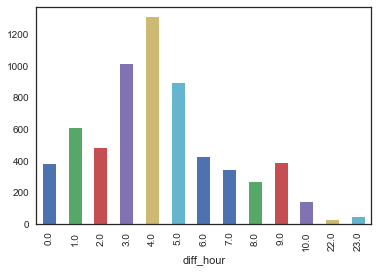

In [31]:
 import matplotlib.pyplot as plt
# plt.scatter(df1.diff_hour, df1.serial_id)
# plt.show()

df1.plot.bar()
plt.show()

C:\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


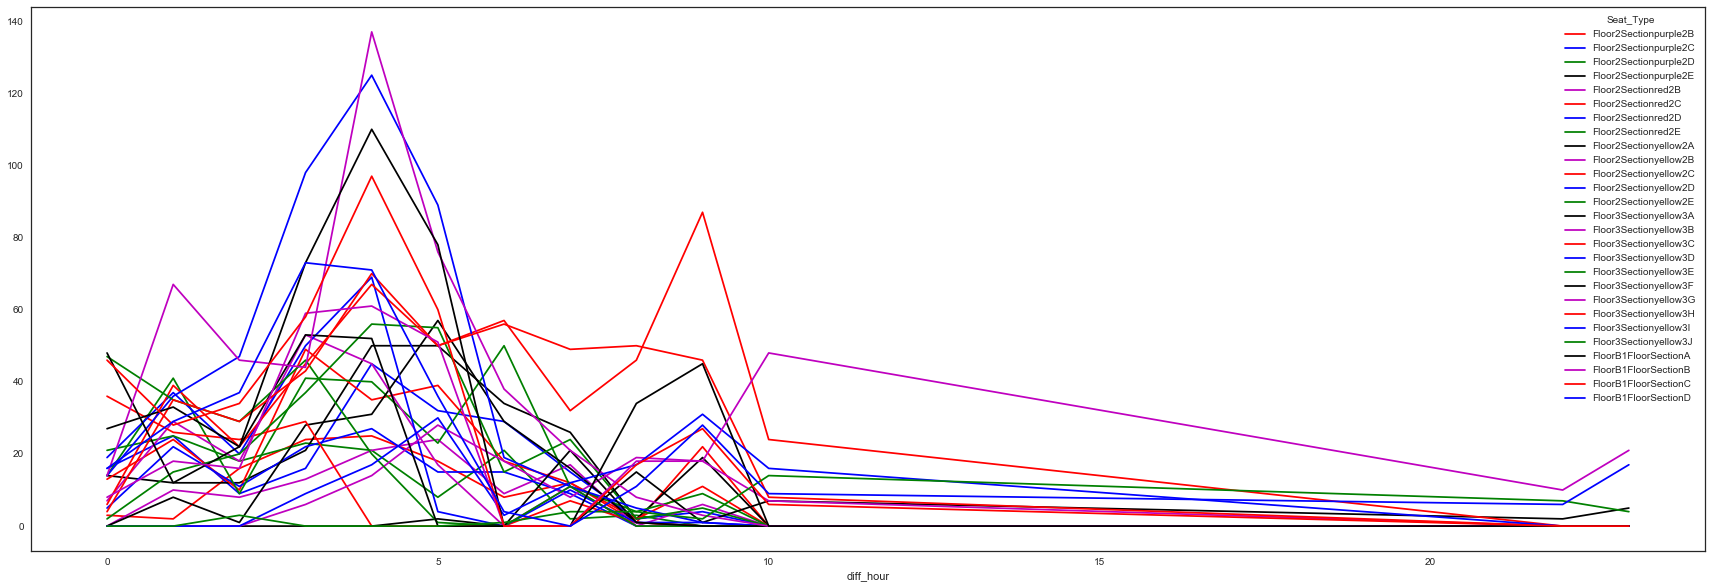

In [32]:

df2 = df.groupby(['diff_hour', 'Seat_Type']).count()['SERIAL_ID'].unstack()
df2 = df2.fillna(0)
fig, ax = plt.subplots(figsize=(30,10))

ctr = 0
colors=[]
for color in ['r','b','g', 'k', 'm']:
    if ctr < 27 :
        colors.append(color)
        ctr+=1
    
ax.set_color_cycle(colors)
df2.plot(kind='line', ax=ax)
plt.show()

In [33]:
df2

Seat_Type,Floor2Sectionpurple2B,Floor2Sectionpurple2C,Floor2Sectionpurple2D,Floor2Sectionpurple2E,Floor2Sectionred2B,Floor2Sectionred2C,Floor2Sectionred2D,Floor2Sectionred2E,Floor2Sectionyellow2A,Floor2Sectionyellow2B,...,Floor3Sectionyellow3E,Floor3Sectionyellow3F,Floor3Sectionyellow3G,Floor3Sectionyellow3H,Floor3Sectionyellow3I,Floor3Sectionyellow3J,FloorB1FloorSectionA,FloorB1FloorSectionB,FloorB1FloorSectionC,FloorB1FloorSectionD
diff_hour,,,,,,,,,,,,,,,,,,,,,
0.0,3.0,16.0,21.0,14.0,0.0,13.0,5.0,14.0,0.0,7.0,...,47.0,48.0,14.0,4.0,0.0,0.0,27.0,8.0,46.0,16.0
1.0,2.0,25.0,25.0,12.0,10.0,24.0,22.0,41.0,8.0,29.0,...,35.0,12.0,67.0,35.0,0.0,0.0,33.0,18.0,28.0,29.0
2.0,16.0,9.0,18.0,12.0,8.0,10.0,11.0,9.0,1.0,18.0,...,29.0,22.0,46.0,29.0,0.0,3.0,22.0,16.0,34.0,37.0
3.0,24.0,16.0,23.0,21.0,13.0,49.0,22.0,41.0,28.0,53.0,...,46.0,53.0,44.0,43.0,9.0,0.0,73.0,59.0,58.0,73.0
4.0,25.0,45.0,21.0,50.0,21.0,35.0,27.0,40.0,31.0,45.0,...,20.0,52.0,137.0,70.0,17.0,0.0,110.0,61.0,97.0,71.0
5.0,18.0,32.0,8.0,50.0,24.0,39.0,15.0,23.0,57.0,17.0,...,1.0,0.0,76.0,50.0,30.0,0.0,78.0,51.0,60.0,36.0
6.0,8.0,29.0,21.0,34.0,9.0,18.0,15.0,50.0,29.0,0.0,...,0.0,0.0,38.0,56.0,3.0,1.0,0.0,0.0,0.0,4.0
7.0,12.0,15.0,2.0,26.0,17.0,12.0,9.0,11.0,16.0,11.0,...,11.0,21.0,21.0,49.0,12.0,4.0,0.0,0.0,0.0,0.0
8.0,1.0,2.0,3.0,2.0,0.0,2.0,0.0,4.0,1.0,0.0,...,0.0,1.0,8.0,50.0,17.0,4.0,34.0,18.0,17.0,11.0


In [34]:
df

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,TICKET_BOOTH_RUNNING_NUM,PRICE,Ticket_Type,Seat_Type,FLOOR_NO,SEAT_ROW,SEAT_NO,TICKET_FEE,TICKET_ENTRANCE_NO,SEX,my_date,my_date_open,diff,diff_hour
6430,35032,21314,38906,4,E12347,31648,3500,member,Floor2Sectionyellow2B,1,9.0,24.0,50,0,male,2010-09-18 13:18:55,2010-09-18 13:18:55,00:00:00,0.0
6653,35511,21315,38907,6,C12086,31649,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
6650,35508,21315,38910,4,C12086,31652,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
6652,35510,21315,38908,5,C12086,31650,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
6651,35509,21315,38909,4,C12086,31651,4000,member,FloorB1FloorSectionA,1,NaN,NaN,50,1,male,2010-09-18 13:22:33,2010-09-18 13:18:55,00:03:38,0.0
954,12329,21316,38911,3,G22178,31654,2500,member,Floor3Sectionyellow3F,1,1.0,2.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53,0.0
953,12328,21316,38912,3,G22178,31655,2500,member,Floor3Sectionyellow3F,1,1.0,1.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53,0.0
952,12327,21316,38913,3,G22178,31653,2500,member,Floor3Sectionyellow3F,1,1.0,3.0,50,0,female,2010-09-18 13:23:48,2010-09-18 13:18:55,00:04:53,0.0
2426,25857,21317,38915,3,S12312,31657,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,00:10:51,0.0
2427,25858,21317,38914,3,S12312,31656,4000,member,FloorB1FloorSectionC,1,NaN,NaN,50,1,male,2010-09-18 13:29:46,2010-09-18 13:18:55,00:10:51,0.0


In [35]:
# dfx['diff_x'].astype('timedelta64[s]')

In [36]:
# dfx = df.sort_values('my_date')
# dfx['diff_x'] = timedelta(microseconds=0)
# tmpi = 1
# dfx['diff_y'] = 0
# for i in range(1, len(dfx)):
#     new_x = dfx.my_date.iloc[i] - dfx.my_date.iloc[i-1]
#     dfx.diff_x.iloc[i] = new_x
#     if new_x <= timedelta(minutes=1):
#         dfx.diff_y.iloc[i-1] = tmpi
#         dfx.diff_y.iloc[i] = tmpi
#     else:
#         dfx.diff_y.iloc[i] = 0
#         if dfx.diff_y.iloc[i-1] > 0:
#             tmpi+=1

# dfx

tmpdfx = dfx.groupby(['diff_y']).agg({'total':count,      # find the sum of the durations for each group
                                     'min_time': "min", # find the number of network type entries
                                     'max_time': 'max'})    # get the first date per group
tmpdfx

In [37]:
# data.groupby(['month', 'item']).agg({'duration':sum,      # find the sum of the durations for each group
#                                      'network_type': "count", # find the number of network type entries
#                                      'date': 'first'})    # get the first date per group

In [38]:
# tmpdfx = dfx.groupby(['diff_y']).agg({'diff_y':"count", # find the sum of the durations for each group 
#                                       'my_date': ["min", "max"]}) # get the first date per group
# tmpdfx.sort_values([('my_date','max')], ascending=False)

In [39]:
# dfxn = dfn.sort_values('my_date')
# dfxn['diff_x'] = timedelta(microseconds=0)
# tmpi = 1
# dfxn['diff_y'] = 0
# for i in range(1, len(dfxn)):
#     new_x = dfxn.my_date.iloc[i] - dfxn.my_date.iloc[i-1]
#     dfxn.diff_x.iloc[i] = new_x
#     if new_x <= timedelta(minutes=1):
#         dfxn.diff_y.iloc[i-1] = tmpi
#         dfxn.diff_y.iloc[i] = tmpi
#     else:
#         dfxn.diff_y.iloc[i] = 0
#         if dfxn.diff_y.iloc[i-1] > 0:
#             tmpi+=1

# dfxn

In [40]:
# tmpdfxn = dfxn.groupby(['diff_y']).agg({'diff_y':"count", # find the sum of the durations for each group 
#                                       'my_date': ["min", "max"]}) # get the first date per group
# tmpdfxn.sort_values([('my_date','max')], ascending=False)
# tmpdfxn.to_csv("D:/nonmember.csv", encoding='utf-8')

In [41]:
df1.sort_values(ascending=False)

diff_hour
4.0     1306
3.0     1013
5.0      893
1.0      608
2.0      483
6.0      424
9.0      384
0.0      380
7.0      341
8.0      264
10.0     139
23.0      47
22.0      25
Name: diff_hour, dtype: int64

In [42]:
17/611

0.027823240589198037

C:\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


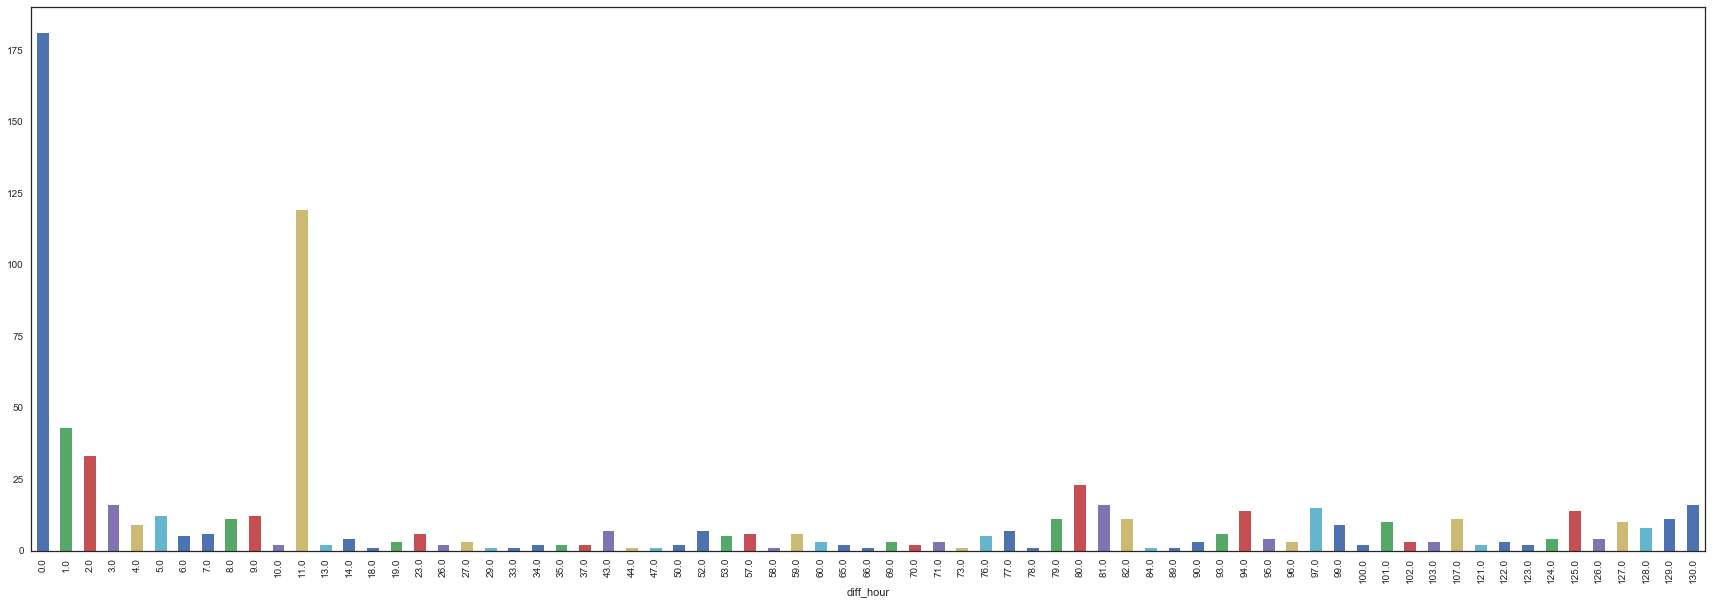

In [43]:
dfn['diff_hour']=np.floor(dfn['diff'].astype('timedelta64[s]')/3600)

dfn=dfn.sort_values('diff')

df1n = dfn.groupby('diff_hour').diff_hour.count()
df1n



df2n = dfn.groupby(['diff_hour', 'Seat_Type']).count().unstack()
df2n = df2n.fillna(0)
df2n

# plt.scatter(df1.diff_hour, df1.serial_id)
# plt.show()

fig, ax = plt.subplots(figsize=(30,10))
df1n.plot.bar(ax=ax)
plt.show()

In [44]:
df4 = dfn.groupby('diff_hour').agg({'diff_hour' : "count",
                                  'PRICE' : 'sum'
                                  })
#df4.sort_values(['PRICE'],ascending=False)
df4

,diff_hour,PRICE
diff_hour,,
0.0,181,553100
1.0,43,156500
2.0,33,114900
3.0,16,59000
4.0,9,30100
5.0,12,44000
6.0,5,19000
7.0,6,23500
8.0,11,38600


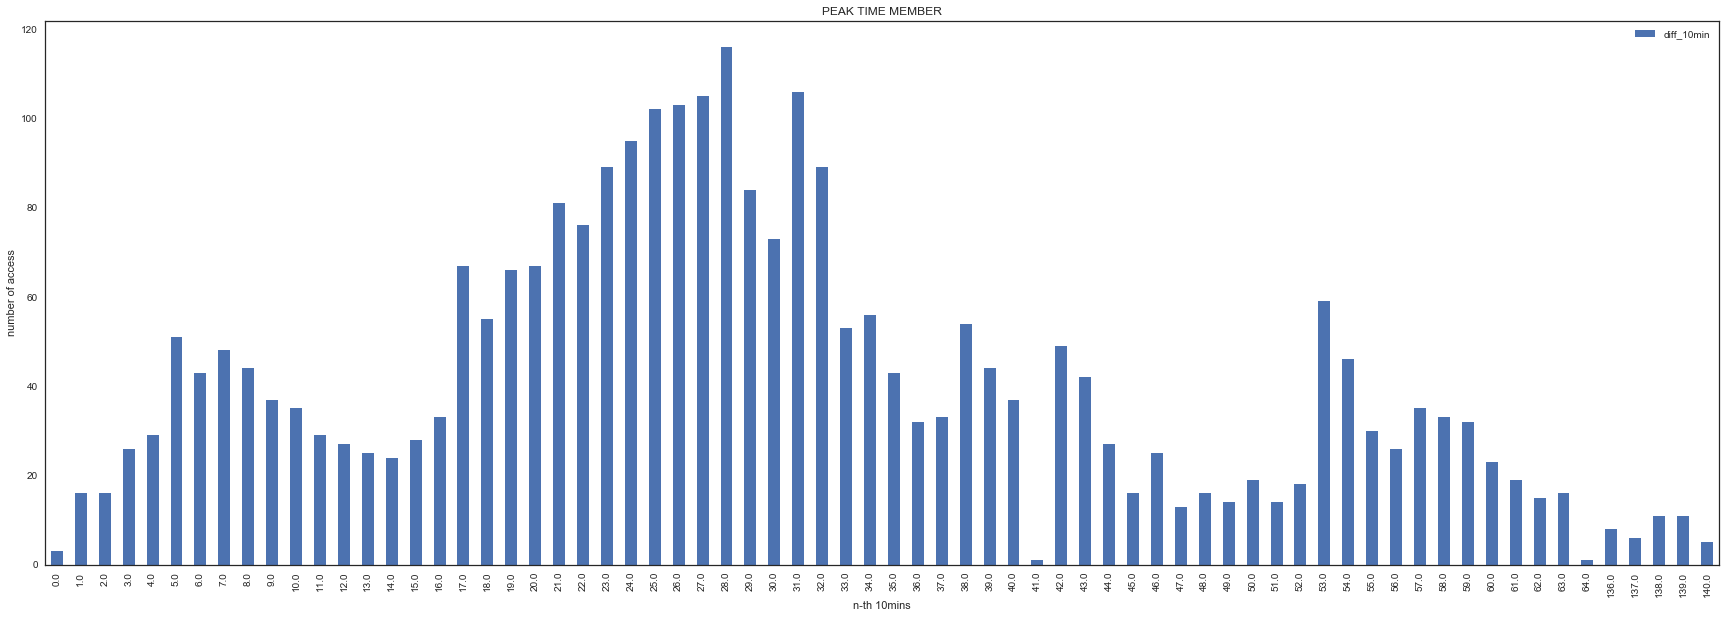

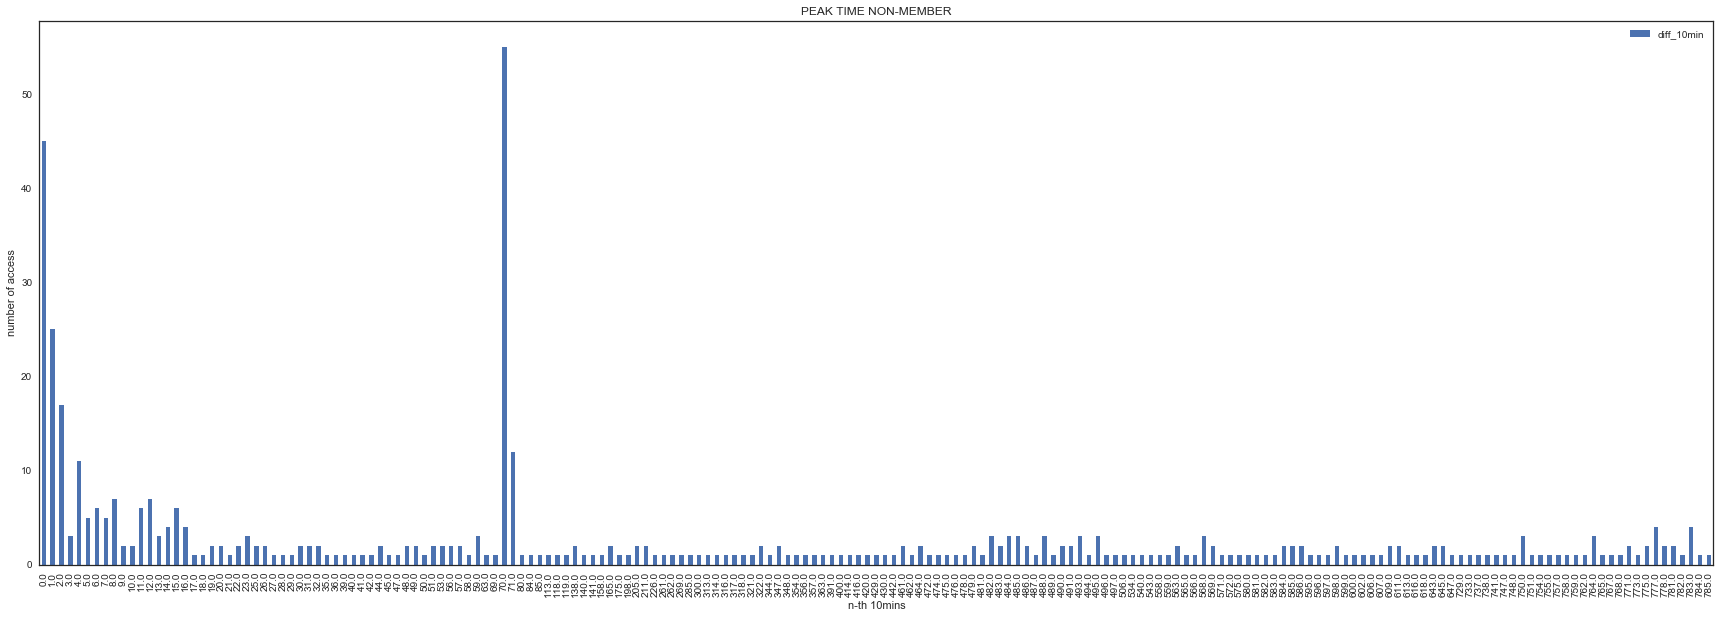

In [45]:
df5 = df
df6 = dfn
df5['diff_10min']=np.floor(df5['diff'].astype('timedelta64[s]')/600)
df6['diff_10min']=np.floor(df6['diff'].astype('timedelta64[s]')/600)

dfdistinct = df5.drop_duplicates(subset='ORDER_ID', keep='first', inplace=False)
dfdistinct = dfdistinct.sort_values(['ORDER_ID'],ascending=True)
dfdistinct = dfdistinct.groupby('diff_10min').agg({'diff_10min' : "count"})

dfdistinct2 = df6.drop_duplicates(subset='ORDER_ID', keep='first', inplace=False)
dfdistinct2 = dfdistinct2.sort_values(['ORDER_ID'],ascending=True)
dfdistinct2 = dfdistinct2.groupby('diff_10min').agg({'diff_10min' : "count"})

# df5[['ORDER_ID', 'TICKET_ITEM_ID', 'PRINT_TIMES', 'IDENTITY', 'PRICE', 'Seat_Type', 'FLOOR_NO', 'SEAT_ROW', 'SEAT_NO', 'my_date']]
fig, ax = plt.subplots(figsize=(30,10))
dfdistinct.plot.bar(ax=ax)
plt.title('PEAK TIME MEMBER')
plt.xlabel('n-th 10mins')
plt.ylabel('number of access')
plt.show()

fig, ax = plt.subplots(figsize=(30,10))
dfdistinct2.plot.bar(ax=ax)
plt.title('PEAK TIME NON-MEMBER')
plt.xlabel('n-th 10mins')
plt.ylabel('number of access')
plt.show()


In [64]:
df5['group_loc']=df5.Seat_Type.str.slice(stop=6)
dfgrouploc = df5
dfgrouploc = dfgrouploc.groupby(['diff_10min', 'group_loc']).count()['SERIAL_ID'].unstack()
dfgrouploc = dfgrouploc.fillna(0)

dfgroup = df5.groupby(['group_loc']).count()['SERIAL_ID']
a = dfgroup[0]
b = dfgroup[1]
c = dfgroup[2]

dfgrouploc['totala'] = 0
dfgrouploc['remaininga'] = 0
dfgrouploc['totalb'] = 0
dfgrouploc['remainingb'] = 0
dfgrouploc['totalc'] = 0
dfgrouploc['remainingc'] = 0
dfgrouploc['percenta'] = 0
dfgrouploc['percentb'] = 0
dfgrouploc['percentc'] = 0
for i in range(0, len(dfgrouploc)):
    dfgrouploc.totala.iloc[i] = dfgroup[0]
    dfgrouploc.remaininga.iloc[i] = a
    dfgrouploc.percenta.iloc[i] = a / dfgroup[0]
    a = a-dfgrouploc.Floor2.iloc[i]
    
    dfgrouploc.totalb.iloc[i] = dfgroup[1]
    dfgrouploc.remainingb.iloc[i] = b
    dfgrouploc.percentb.iloc[i] = b / dfgroup[1]
    b = b-dfgrouploc.Floor3.iloc[i]
    
    dfgrouploc.totalc.iloc[i] = dfgroup[2]
    dfgrouploc.remainingc.iloc[i] = c
    dfgrouploc.percentc.iloc[i] = c / dfgroup[2]
    c = c-dfgrouploc.FloorB.iloc[i]

dfgrouploc
# def is_nan(x):
#     return (x is np.nan or x != x)
# dfgrouploc = df5.groupby(['diff_10min', 'group_loc'])['SERIAL_ID'].transform(lambda x : x.count())
# dfgrouploc = df5.groupby(['diff_10min', 'group_loc'])['SERIAL_ID'].apply(lambda x: 0 if x.astype(float)=np.nan else x.astype(float)/x.sum())
# dfgrouploc = dfgrouploc.fillna(0)
# dfgrouploc = dfgrouploc.iloc[2].apply(lambda x: x.astype(float)/x.sum())

C:\Miniconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


group_loc,Floor2,Floor3,FloorB,totala,remaininga,totalb,remainingb,totalc,remainingc,percenta,percentb,percentc
diff_10min,,,,,,,,,,,,
0.0,1.0,3.0,4.0,2311,2311.0,2536,2536.0,1460,1460.0,1.000000,1.000000,1.000000
1.0,12.0,17.0,15.0,2311,2310.0,2536,2533.0,1460,1456.0,0.999567,0.998817,0.997260
2.0,22.0,12.0,12.0,2311,2298.0,2536,2516.0,1460,1441.0,0.994375,0.992114,0.986986
3.0,25.0,29.0,16.0,2311,2276.0,2536,2504.0,1460,1429.0,0.984855,0.987382,0.978767
4.0,19.0,31.0,16.0,2311,2251.0,2536,2475.0,1460,1413.0,0.974037,0.975946,0.967808
5.0,71.0,41.0,34.0,2311,2232.0,2536,2444.0,1460,1397.0,0.965816,0.963722,0.956849
6.0,51.0,50.0,12.0,2311,2161.0,2536,2403.0,1460,1363.0,0.935093,0.947555,0.933562
7.0,46.0,43.0,30.0,2311,2110.0,2536,2353.0,1460,1351.0,0.913025,0.927839,0.925342
8.0,53.0,44.0,14.0,2311,2064.0,2536,2310.0,1460,1321.0,0.893120,0.910883,0.904795


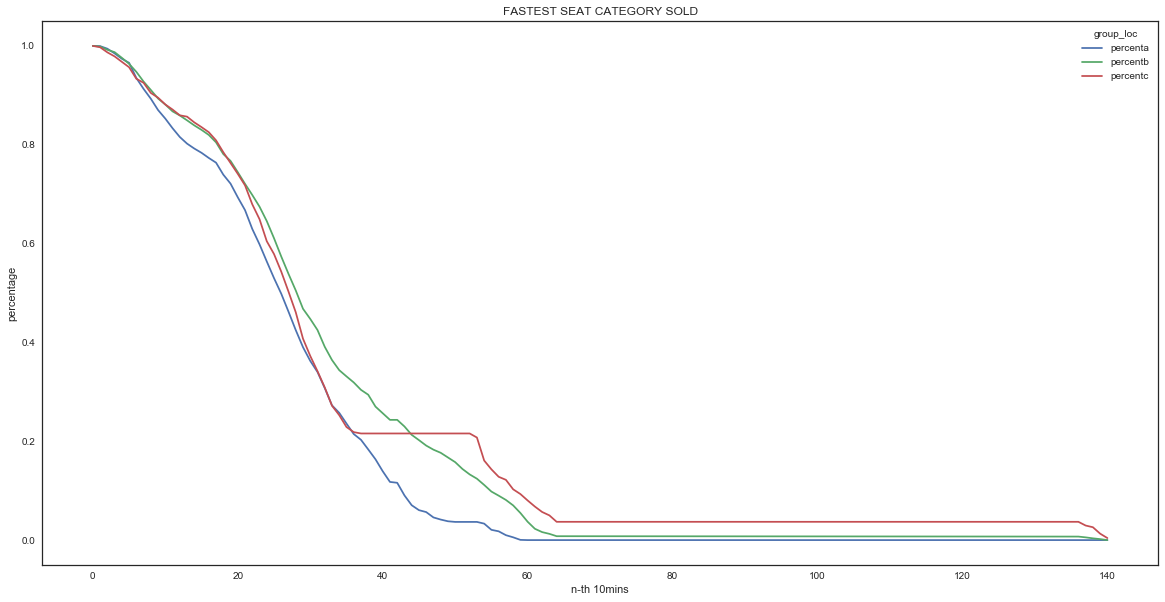

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
plotfordfgroup = dfgrouploc[['percenta','percentb','percentc']]
plotfordfgroup.plot(kind='line', ax=ax)
plt.title('FASTEST SEAT CATEGORY SOLD')
plt.xlabel('n-th 10mins')
plt.ylabel('percentage')
plt.show()

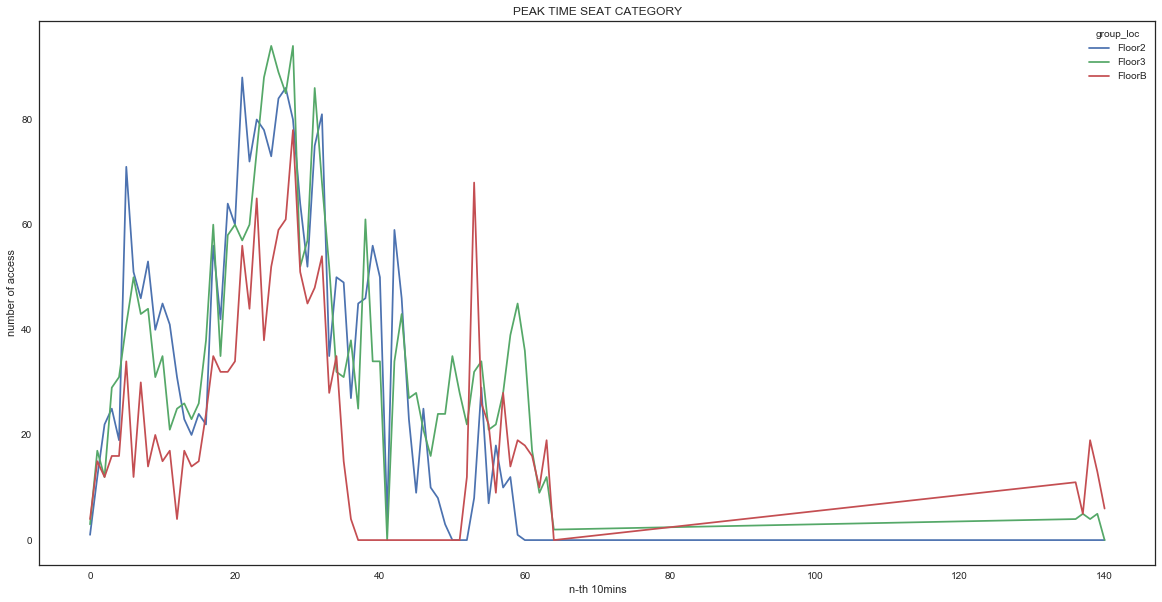

In [48]:
dfgrouploc2 = df5
dfgrouploc2 = dfgrouploc2.groupby(['diff_10min', 'group_loc']).count()['SERIAL_ID'].unstack()
dfgrouploc2 = dfgrouploc2.fillna(0)
fig, ax = plt.subplots(figsize=(20,10))
dfgrouploc2.plot(kind='line', ax=ax)
plt.title('PEAK TIME SEAT CATEGORY')
plt.xlabel('n-th 10mins')
plt.ylabel('number of access')
plt.show()

In [49]:
df_efficiency=dfdistinct/116*100

df_efficiency

,diff_10min
diff_10min,
0.0,2.586207
1.0,13.793103
2.0,13.793103
3.0,22.413793
4.0,25.000000
5.0,43.965517
6.0,37.068966
7.0,41.379310
8.0,37.931034


In [50]:
df_efficiency.describe()

,diff_10min
count,70.000000
mean,35.344828
std,25.129128
min,0.862069
25%,15.732759
50%,28.448276
75%,47.198276
max,100.000000


In [51]:
dfdistinct.describe()

,diff_10min
count,70.000000
mean,41.000000
std,29.149788
min,1.000000
25%,18.250000
50%,33.000000
75%,54.750000
max,116.000000


In [52]:
df_efficiency2=dfdistinct2/116*100

df_efficiency2

,diff_10min
diff_10min,
0.0,38.793103
1.0,21.551724
2.0,14.655172
3.0,2.586207
4.0,9.482759
5.0,4.310345
6.0,5.172414
7.0,4.310345
8.0,6.034483


In [53]:
df_efficiency2.describe()

,diff_10min
count,189.000000
mean,2.120963
std,4.793596
min,0.862069
25%,0.862069
50%,0.862069
75%,1.724138
max,47.413793


In [54]:
dfdistinct2.describe()

,diff_10min
count,189.000000
mean,2.460317
std,5.560572
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,55.000000


In [55]:
df_efficiency2.apply(pd.value_counts)

,diff_10min
0.862069,115
1.724138,44
2.586207,13
3.448276,4
5.172414,3
6.034483,2
4.310345,2
14.655172,1
38.793103,1
9.482759,1


In [56]:
df_efficiency.apply(pd.value_counts)

,diff_10min
13.793103,5
28.448276,3
25.000000,2
37.068966,2
12.068966,2
27.586207,2
57.758621,2
21.551724,2
30.172414,2
23.275862,2


In [57]:
dfgrouploc2.describe()

group_loc,Floor2,Floor3,FloorB
count,70.000000,70.000000,70.000000
mean,33.014286,36.228571,20.857143
std,28.102552,23.634396,19.933430
min,0.000000,0.000000,0.000000
25%,7.250000,22.000000,4.000000
50%,26.000000,32.000000,15.500000
75%,52.750000,48.750000,32.000000
max,88.000000,94.000000,78.000000


In [58]:
dfgrouploc.describe()

group_loc,Floor2,Floor3,FloorB,totala,remaininga,totalb,remainingb,totalc,remainingc,percenta,percentb,percentc
count,70.000000,70.000000,70.000000,70.0,70.000000,70.0,70.000000,70.0,70.000000,70.000000,70.000000,70.000000
mean,33.014286,36.228571,20.857143,2311.0,872.228571,2536.0,1117.800000,1460.0,637.614286,0.377425,0.440773,0.436722
std,28.102552,23.634396,19.933430,0.0,843.508909,0.0,877.065043,0.0,490.920144,0.364997,0.345846,0.336247
min,0.000000,0.000000,0.000000,2311.0,0.000000,2536.0,0.000000,1460.0,6.000000,0.000000,0.000000,0.004110
25%,7.250000,22.000000,4.000000,2311.0,85.000000,2536.0,344.000000,1460.0,315.000000,0.036781,0.135647,0.215753
50%,26.000000,32.000000,15.500000,2311.0,570.000000,2536.0,856.000000,1460.0,351.500000,0.246646,0.337539,0.240753
75%,52.750000,48.750000,32.000000,2311.0,1751.000000,2536.0,2026.000000,1460.0,1172.250000,0.757681,0.798896,0.802911
max,88.000000,94.000000,78.000000,2311.0,2311.000000,2536.0,2536.000000,1460.0,1460.000000,1.000000,1.000000,1.000000


In [59]:
diff_dfdistinct = dfdistinct.diff()

diff_dfdistinct = diff_dfdistinct.abs()

# diff_dfdistinct

asd = diff_dfdistinct.sort_values("diff_10min", ascending = True)

asd.describe()

,diff_10min
count,69.000000
mean,10.173913
std,10.541175
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,48.000000


In [60]:
asd

,diff_10min
diff_10min,
2.0,0.0
139.0,0.0
26.0,1.0
59.0,1.0
14.0,1.0
20.0,1.0
37.0,1.0
63.0,1.0
10.0,2.0
